In [1]:
import pandas as pd
import pyUn0 as us
import pickle
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import hilbert, resample
import cv2
from scipy import ndimage, signal 

Not loading RPi.GPIO as not on RPi
pyexiv2 does not exist on RPi


20200608a-10.json
972802 486401.0 486400
Data acquired
PyExiv not present
PyExiv not present
1520 320
PyExiv not present


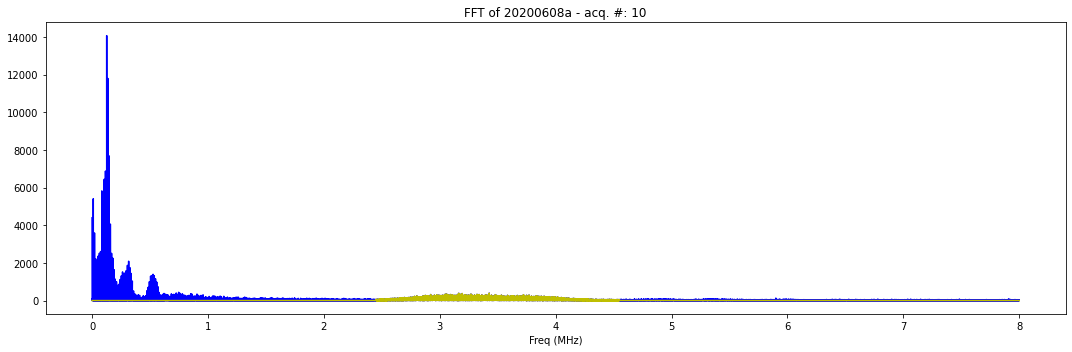

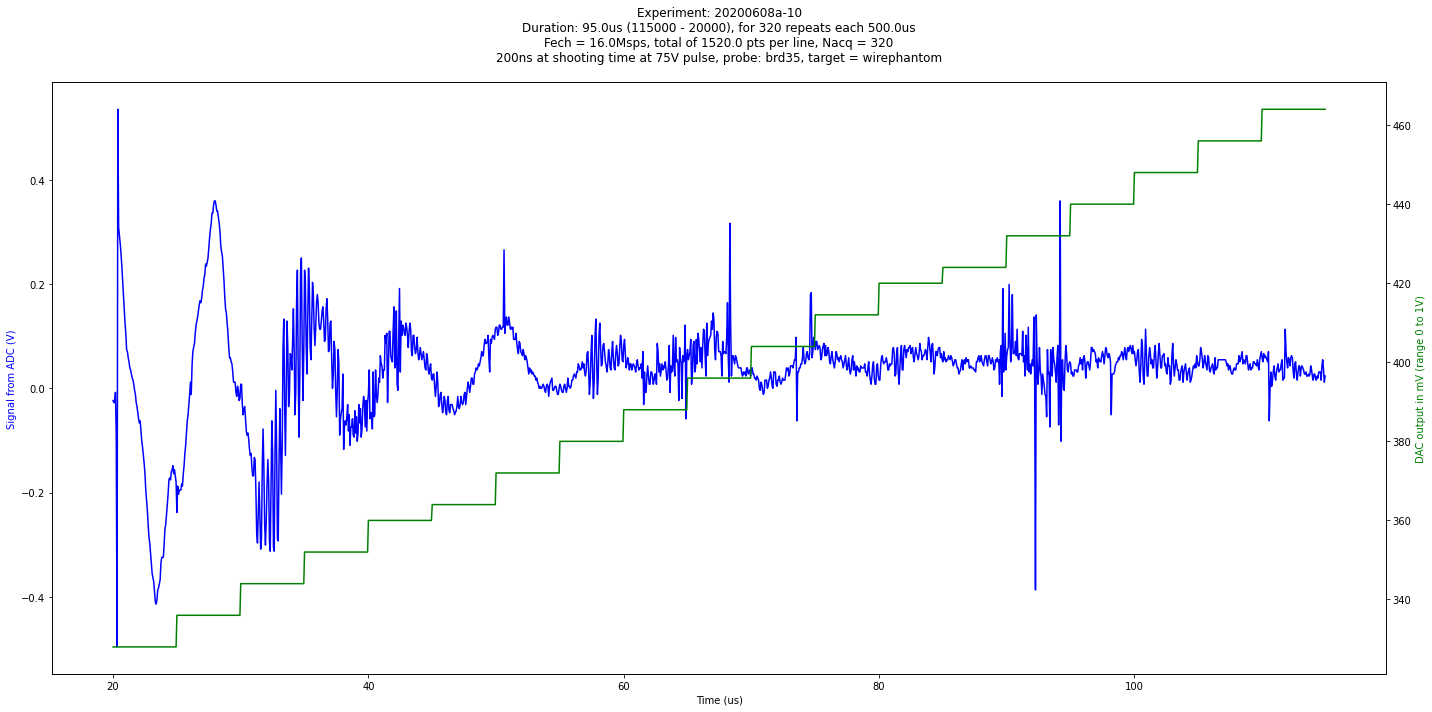

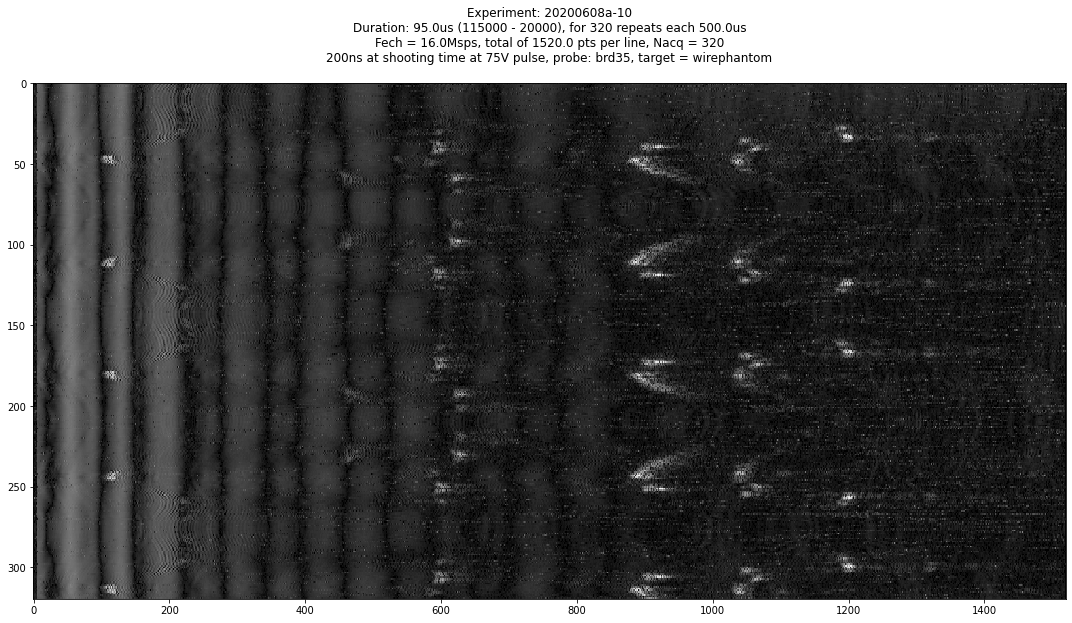

In [2]:
MyDataFile = "20200608a-10.json"

if MyDataFile.endswith(".json"):
    print(MyDataFile)
    y = us.us_json()
    y.show_images = False
    y.JSONprocessing("./data/"+MyDataFile)
    y.fPiezo = 3.5
    y.Bandwidth = 0.6
    y.create_fft() 
    y.save_npz() 
    y.mkImg()
if y.Nacq > 1:
    y.mk2DArray()

1520 320
PyExiv not present


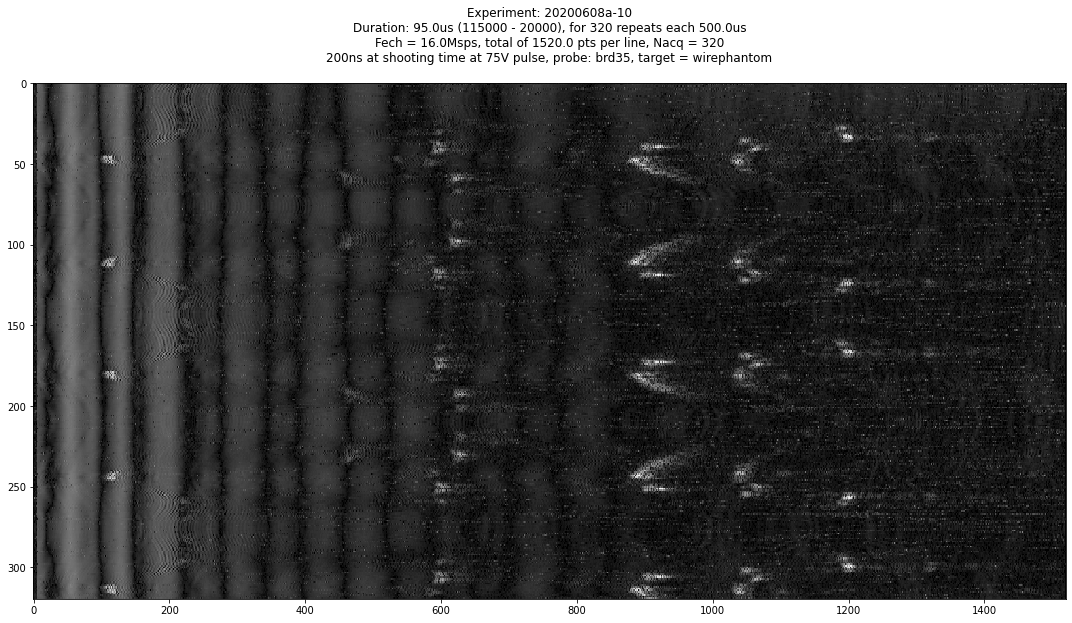

In [4]:
raw_image = y.mk2DArray()
clean_image, fft_image_filtered = y.mkFiltered(raw_image)

14.0
80.0
146.0
212.0
278.0


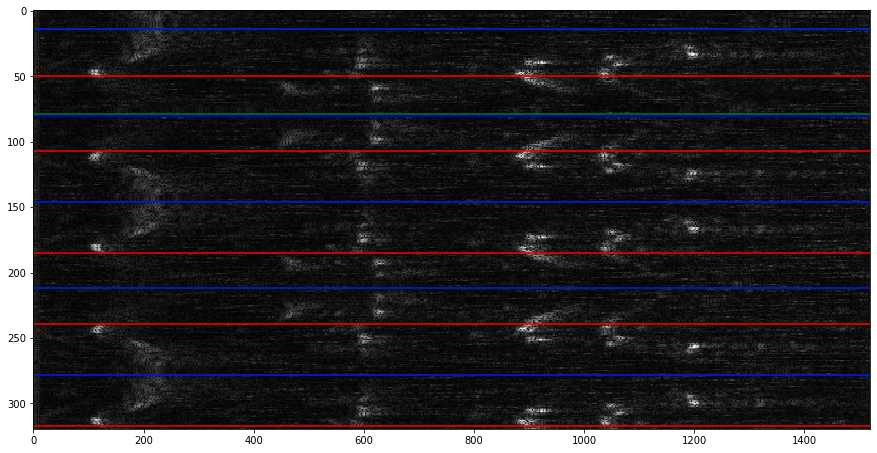

In [44]:
img_size =np.shape(clean_image)
plt.figure(figsize=(15, 15))
plt.imshow(np.sqrt(np.abs(clean_image)), cmap='gray', aspect=0.5*(img_size[1]/img_size[0]), interpolation='nearest')
RED = [50,107,185,239,317]
for x in RED:
    plt.axhline(y=x,color="red")
for k in range(len(RED)-1):
    #print(RED[k]+(RED[k+1]-RED[k])/2),print(278-146)
    plt.axhline(y=RED[k]+(RED[k+1]-RED[k])/2,color="green")
    #print(RED[k]+(RED[k+1]-RED[k])/2)
    length = 132/2
    plt.axhline(y=146-132,color="green")
for blue in range(5):
    plt.axhline(y=14+132/2*blue,color="blue")
    print(14+132/2*blue)
plt.show()

In [33]:
tInterline = y.parameters['PeriodAcq_Real']/1000.0 # in us
fImage = 1 / (length * tInterline / 1E6)
print(fImage,"images per second.")
print("Close enough to", " (32*60/4)/16 = ",32*60/4/16, " - that's 1/16 of the control freq")

30.3030303030303 images per second.
Close enough to  (32*60/4)/16 =  30.0  - that's 1/16 of the control freq


In [47]:
B = np.flipud(clean_image[80:146])
C = np.flipud(clean_image[212:278])
tmp = np.add(np.abs(clean_image[14:80]),np.abs(clean_image[146:212]))
tmp = np.add(tmp,np.abs(B))
tmp = np.add(tmp,np.abs(C))

In [48]:
np.shape(tmp),np.shape(clean_image[61:224]),np.shape(clean_image[387:550])

((66, 1520), (163, 1520), (0,))

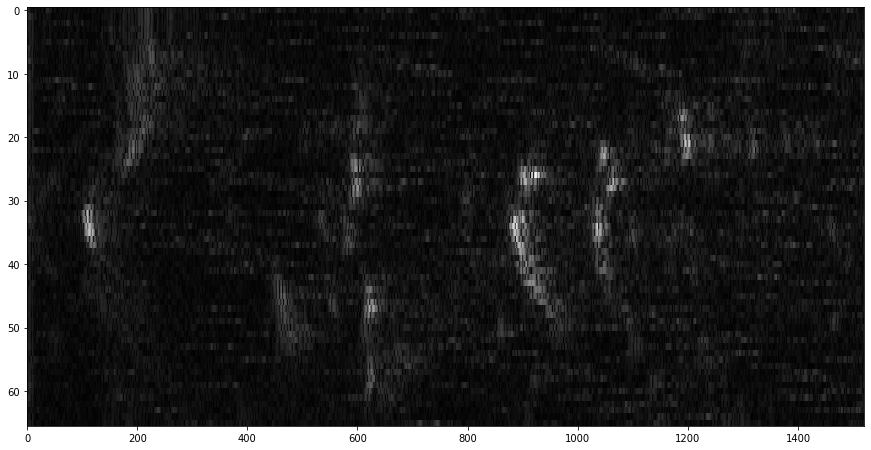

In [49]:
img_size =np.shape(B)
plt.figure(figsize=(15, 15))
plt.imshow(np.sqrt(np.abs(B)), cmap='gray', aspect=0.5*(img_size[1]/img_size[0]), interpolation='nearest')


In [58]:
img_size =np.shape(B)
print(32.5*64/5.0)
a = np.asarray(B)
b = np.zeros((img_size[0],320)) #320 for the piezo offset
print(np.shape(a),np.shape(b))

c = np.c_[b,a]

b = np.zeros((int(1.6*img_size[0]),img_size[1]+320)) #70 for the piezo offset
d = np.zeros((int(1.6*img_size[0]),img_size[1]+320)) #70 for the piezo offset
print(np.shape(d),np.shape(c),np.shape(b))
c = np.concatenate([d,c,b])
np.shape(c)

416.0
(66, 1520) (66, 320)
(105, 1840) (66, 1840) (105, 1840)


(276, 1840)

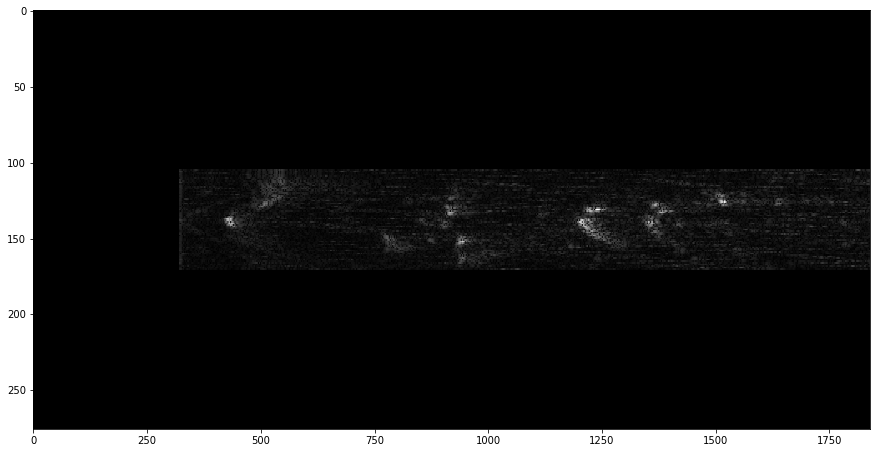

In [59]:
img_size =np.shape(c)
plt.figure(figsize=(15, 15))
plt.imshow(np.sqrt(np.abs(c)), cmap='gray', aspect=0.5*(img_size[1]/img_size[0]), interpolation='nearest')


# Scan conversion

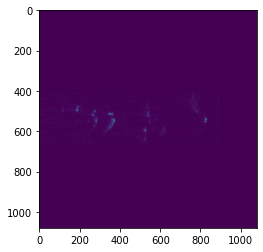

In [60]:
factor = 3*360 / np.shape(c)[0] 
ResizedFront = ndimage.zoom(np.fliplr(c), (1*factor, factor*np.shape(c)[0]/np.shape(c)[1]))
plt.imshow(np.abs(ResizedFront))

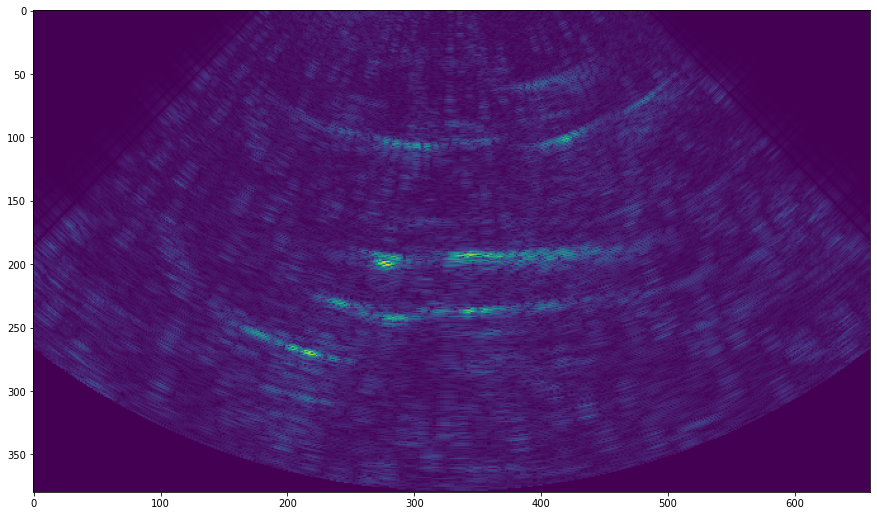

In [61]:
Front_Image = cv2.linearPolar(np.flip(ResizedFront), (3*180, 3*180), 3*180, cv2.WARP_INVERSE_MAP | cv2.WARP_FILL_OUTLIERS)
plt.figure(figsize=(15, 15))
RES = np.rot90(np.sqrt(np.abs(Front_Image)))[700:,210:870]
plt.imshow(RES)